In [77]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [78]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [79]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training",
    shuffle=True,
    image_size = ( IMAGE_SIZE, IMAGE_SIZE),
    batch_size = ( BATCH_SIZE )
)


Found 2152 files belonging to 3 classes.


In [80]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [81]:
len(dataset)

68

In [82]:
68*32

2176

In [83]:
for image_batch, label_batch in dataset .take(1):
    print (image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 1 0 1 1 2 1 1 2 1 0 0 0 0 1 0 1 1 1 1 1 2 0 0 0 0 0 1]


In [84]:
# 32 is size of the batch, 256*256 is size of image, 3 RGBimage has 3 channels and 0 is for potato early blight and so on


In [85]:
print (image_batch[0])

tf.Tensor(
[[[182. 168. 167.]
  [186. 172. 171.]
  [187. 173. 172.]
  ...
  [173. 159. 158.]
  [173. 159. 158.]
  [174. 160. 159.]]

 [[182. 168. 167.]
  [179. 165. 164.]
  [176. 162. 161.]
  ...
  [171. 157. 156.]
  [172. 158. 157.]
  [173. 159. 158.]]

 [[174. 160. 159.]
  [172. 158. 157.]
  [168. 154. 153.]
  ...
  [172. 158. 157.]
  [172. 158. 157.]
  [173. 159. 158.]]

 ...

 [[117.  93.  93.]
  [121.  97.  97.]
  [136. 112. 112.]
  ...
  [137. 111. 110.]
  [145. 119. 118.]
  [146. 120. 119.]]

 [[135. 111. 111.]
  [130. 106. 106.]
  [150. 126. 126.]
  ...
  [126. 100.  99.]
  [122.  96.  95.]
  [137. 111. 110.]]

 [[160. 136. 136.]
  [119.  95.  95.]
  [116.  92.  92.]
  ...
  [138. 112. 111.]
  [135. 109. 108.]
  [148. 122. 121.]]], shape=(256, 256, 3), dtype=float32)


In [86]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [87]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [88]:
train_ds = dataset.take(54)
len(train_ds)

54

In [89]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [90]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [91]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [92]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [93]:
def get_dataset_partitions_tf(ds, train_split= 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed =12)

    train_size = int(train_split* ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [94]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [95]:
len(train_ds)

54

In [96]:
len(val_ds)

6

In [97]:
len(test_ds)

8

In [98]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(100).prefetch(buffer_size =tf.data.AUTOTUNE)

In [99]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])
    

In [100]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [101]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
    

In [102]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_9 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(
    optimizer ='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics=['accuracy']
)

In [113]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 577ms/step - accuracy: 0.9912 - loss: 0.0241 - val_accuracy: 0.9479 - val_loss: 0.1821
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 546ms/step - accuracy: 0.9931 - loss: 0.0258 - val_accuracy: 0.9740 - val_loss: 0.0955
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.9892 - loss: 0.0299 - val_accuracy: 0.9427 - val_loss: 0.1471
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 557ms/step - accuracy: 0.9900 - loss: 0.0232 - val_accuracy: 0.9635 - val_loss: 0.1558
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 594ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.9635 - val_loss: 0.1012
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 565ms/step - accuracy: 0.9808 - loss: 0.0497 - val_accuracy: 0.9792 - val_loss: 0.0689
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 560ms/step - accuracy: 0.9936 - loss: 0.0160 - val_accuracy: 0.9896 - val_loss: 0.0486
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 577ms/step - accuracy: 0.9946 - loss: 0.0133 - val_accu

In [118]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0078


In [119]:
scores


[0.00702145230025053, 1.0]

In [120]:
history

In [121]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [111]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [122]:
history.history['accuracy']

[0.9890046119689941,
 0.9942129850387573,
 0.9878472089767456,
 0.9918981194496155,
 0.9971064925193787,
 0.9826388955116272,
 0.9924768805503845,
 0.9936342835426331,
 0.9884259104728699,
 0.9803240895271301,
 0.9947916865348816,
 0.9872685074806213,
 0.9901620149612427,
 0.9890046119689941,
 0.9936342835426331,
 0.9959490895271301,
 0.9965277910232544,
 0.9965277910232544,
 0.9930555820465088,
 0.9913194179534912,
 0.984375,
 0.9930555820465088,
 0.9878472089767456,
 0.9837962985038757,
 0.9814814925193787,
 0.9890046119689941,
 0.9965277910232544,
 0.9965277910232544,
 0.9930555820465088,
 0.9930555820465088,
 0.9959490895271301,
 0.9976851940155029,
 0.9861111044883728,
 0.9918981194496155,
 0.9971064925193787,
 0.9907407164573669,
 0.9884259104728699,
 0.9884259104728699,
 0.9866898059844971,
 0.9936342835426331,
 0.9971064925193787,
 1.0,
 1.0,
 1.0,
 0.9953703880310059,
 0.9907407164573669,
 0.9982638955116272,
 0.9918981194496155,
 0.9872685074806213,
 0.9959490895271301]

In [123]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

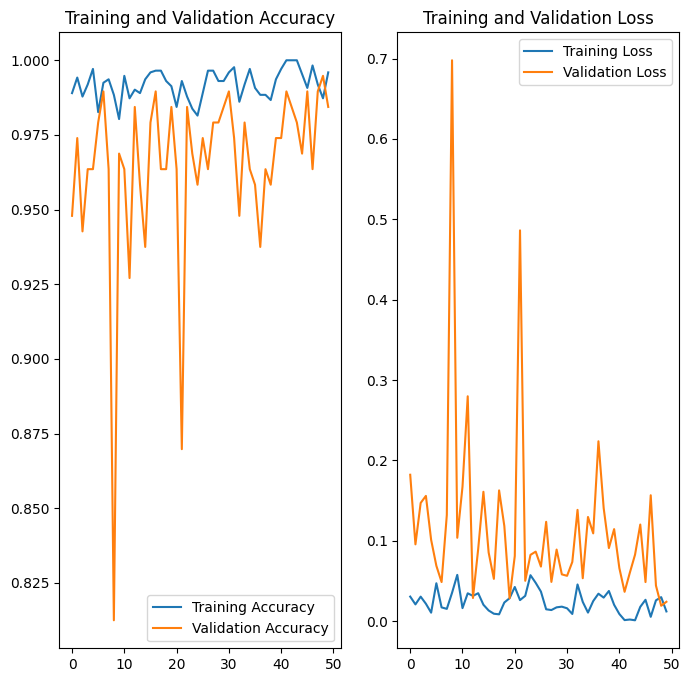

In [125]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label ='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


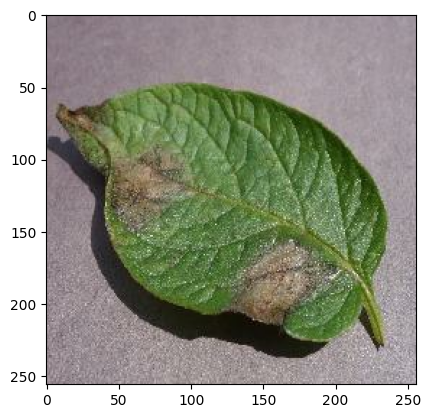

In [134]:
for images_batch,  labels_batch in test_ds.take(1):
   plt.imshow(images_batch[0].numpy().astype('uint8'))
    # if you write print instead it will give array form of the picture

first image to predict
first image's actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
predicted label: Potato___Early_blight


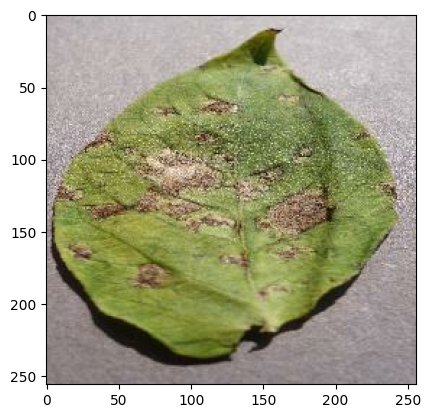

In [144]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image =images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

print("first image to predict")
plt.imshow(first_image)
print("first image's actual label:",class_names[first_label])

batch_prediction = model.predict(images_batch)
print("predicted label:",class_names[np.argmax(batch_prediction[0])])
# in our model architecure we have classes as the output but the function used is softmax so it gives the probability of which class is  lst and so on so the one with highest number is the highest probability prediction


In [154]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


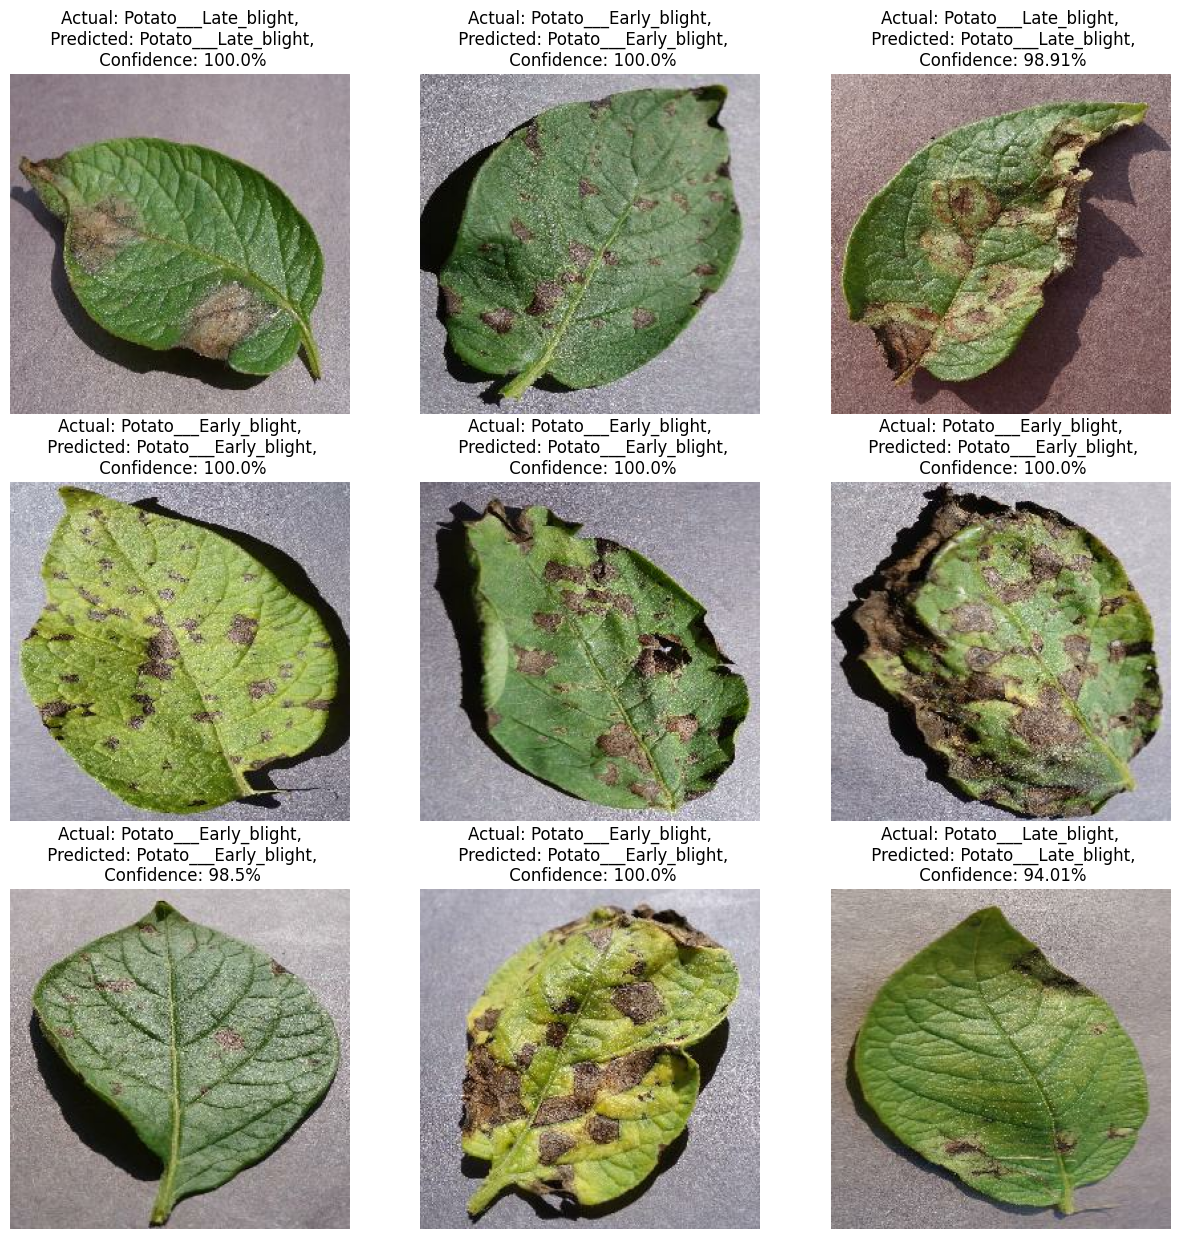

In [157]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [163]:
import os
model_version= max([int (i) for i in os.listdr("../models") +[0]]) +1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets


Saved artifact at '../model/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_54')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1462237026192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237026576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237025808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237027536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237027344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237028304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237028112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237029072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237028880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237029840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1462237029648: TensorSpec(shape=(), d